# Import Libraries

In [64]:
#Python libraries
#Classic,data manipulation 
import numpy as np
import pandas as pd
# Plots
import plotly.graph_objects as go
import plotly.offline as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
import seaborn as sns
import dash
import plotly.express as px
import random
import plotly.figure_factory as ff
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing 
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
# Dataprep
from dataprep.eda import create_report
from dataprep.eda import plot_missing
from dataprep.eda import plot_correlation
from dataprep.eda import plot
# Modeling 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN #resampling
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Diabetes Health Indicators 

This data set indicates the proportion of diabets and No diabetes,The dataset is provided in .csv format. It **contains 254000 observation** , each has **22 features**. The most relevant feature to this project is the **Diabetes_Types (response)**


### Questions:
1. What are the risk factors most predictive of diabetes risk?
2. What is the most age of infection with diabetes?
3. What most genders to have diabetes?

### Steps of the project as follows:
 * Load Dataset
 * Explore Dataset
 * Cleaning Dataset
 * Analysis and Visualization

# Load Dataset 

In [9]:
df=pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv") 
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# Explore Dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [11]:
# Return a tuple representing the dimensionality of the DataFrame.
df.shape

(253680, 22)

In [12]:
#Return a random sample of items from an axis of object.
df.sample(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
161672,0.0,1.0,1.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,15.0,0.0,0.0,0.0,6.0,6.0,8.0
71858,0.0,1.0,1.0,1.0,36.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,0.0,14.0,0.0,1.0,8.0,5.0,8.0
217264,0.0,0.0,0.0,1.0,20.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
70936,0.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,30.0,0.0,1.0,13.0,4.0,7.0
163518,0.0,0.0,1.0,1.0,31.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,6.0,7.0
491,0.0,0.0,1.0,1.0,20.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,7.0
245244,0.0,0.0,0.0,1.0,28.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,15.0,30.0,1.0,1.0,9.0,4.0,4.0
210237,2.0,1.0,0.0,1.0,42.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,4.0,30.0,1.0,0.0,10.0,5.0,8.0
137713,0.0,1.0,1.0,1.0,28.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,5.0,30.0,20.0,1.0,0.0,10.0,5.0,4.0
73571,0.0,1.0,0.0,1.0,26.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,4.0,0.0,30.0,1.0,0.0,12.0,4.0,3.0


In [65]:
# Show the Columns
df.columns

Index(['Diabetes_Type', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'High_blood', 'High_Cholesterol', 'Heart_Attack', 'Genral_Health',
       'Difficulty_Walking', 'Sex_Part', 'Education_level', 'Income_level',
       'Age_level', 'Diabetes'],
      dtype='object')

In [14]:
# to rename the some columns important of dataset
df.rename(columns={'Diabetes_012': 'Diabetes_Type'}, inplace=True)
df.head()

,Diabetes_Type,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


#### In this step, knowing the unique values of the columns that are important for understanding the data and interpreting the values.

In [15]:
df.BMI.unique()

array([40., 25., 28., 27., 24., 30., 34., 26., 33., 21., 23., 22., 38.,
       32., 37., 31., 29., 20., 35., 45., 39., 19., 47., 18., 36., 43.,
       55., 49., 42., 17., 16., 41., 44., 50., 59., 48., 52., 46., 54.,
       57., 53., 14., 15., 51., 58., 63., 61., 56., 74., 62., 64., 66.,
       73., 85., 60., 67., 65., 70., 82., 79., 92., 68., 72., 88., 96.,
       13., 81., 71., 75., 12., 77., 69., 76., 87., 89., 84., 95., 98.,
       91., 86., 83., 80., 90., 78.])

In [24]:
df.GenHlth.unique()

array([5., 3., 2., 4., 1.])

Use `git status` to list all new or modified files that haven't yet been committed.

##### Would say that in general your health is`scale 1-5`
> 1 = `excellent`

> 2 = `very good`

> 3 = `Good`

> 4 = `fair`
 
> 5 =`Poor`


In [66]:
df.MentHlth.unique()

array([18.,  0., 30.,  3.,  5., 15., 10.,  6., 20.,  2., 25.,  1.,  4.,
        7.,  8., 21., 14., 26., 29., 16., 28., 11., 12., 24., 17., 13.,
       27., 19., 22.,  9., 23.])

**Mental Health scale** , `scale 1-30 days`. 

In [68]:
df.PhysHlth.unique()

array([15.,  0., 30.,  2., 14., 28.,  7., 20.,  3., 10.,  1.,  5., 17.,
        4., 19.,  6., 12., 25., 27., 21., 22.,  8., 29., 24.,  9., 16.,
       18., 23., 13., 26., 11.])

Now thinking about your physical health, for how many days during the past 30 days 
was your physical health not good?

> `scale 1-30 days`

In [70]:
df.Age.unique()

array([ 9.,  7., 11., 10.,  8., 13.,  4.,  6.,  2., 12.,  5.,  1.,  3.])

#### **13-level** Age categorys :
> 1 = `18-24 `
 
> 2 = `25-30 `

> 3 = `31-35 `

> 4 = `36-40 `

> 5 = `41-46 `

> 6 = `47-51 `

> 7 = `52-57 `

> 13 = ` over 80 `

In [72]:
df.Education.unique()

array([4., 6., 3., 5., 2., 1.])

**Education level** Scale 1-6:
> 1 = ` Never attended school or only kindergarten`

> 2 = `Elementary`  

> 3 =  `Some high school`

> 4 =  `High school graduate` 

> 5 = `Some college or technical school` 

> 6 = `College graduate`


In [73]:
df.Income.unique()

array([3., 1., 8., 6., 4., 7., 2., 5.])

**Income** Scale 1-8:
> 1 = `less than $10,000` 

> 5 = `less than $35,000` 

> 8 = `$75,000 or more` 


In [83]:
#Transform the data 
df['Diabetes_Type'] = df['Diabetes_Type'].astype('int')

In [84]:
df['Diabetes_Type'].replace({2.0: 1.0},inplace = True)

In [85]:
Diabetes=df['Diabetes_Type']
Diabetes.value_counts()

0    213703
1     39977
Name: Diabetes_Type, dtype: int64

# Cleaning Dataset

In [74]:
df.isna().sum() # No missing value

Diabetes_Type           0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
High_blood              0
High_Cholesterol        0
Heart_Attack            0
Genral_Health           0
Difficulty_Walking      0
Sex_Part                0
Education_level         0
Income_level            0
Age_level               0
Diabetes                0
dtype: int64

#### Display missing values through a library Dataprep.Eda

  0%|                                                                                          | 0/326 [00:00<…


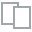
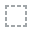
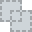
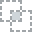
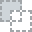
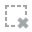
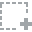
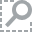
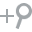
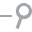
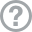
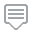
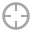
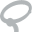
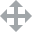
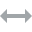
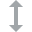
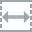
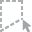
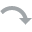
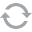
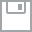
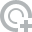
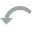
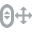
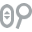
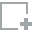
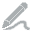
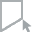
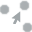
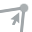
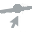

In [35]:
plot_missing(df) 

# Visualzatoin the correlation 

In [80]:
df.corr()

,Diabetes_Type,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_Type,1.000000,0.270334,0.210290,0.067879,0.223851,0.062778,0.104800,0.176933,-0.121392,-0.042088,...,0.014079,0.038025,0.300785,0.074971,0.174948,0.222155,0.029606,0.185891,-0.131803,-0.172794
HighBP,0.270334,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.210290,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.067879,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.223851,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.062778,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.104800,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.176933,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.121392,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.042088,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


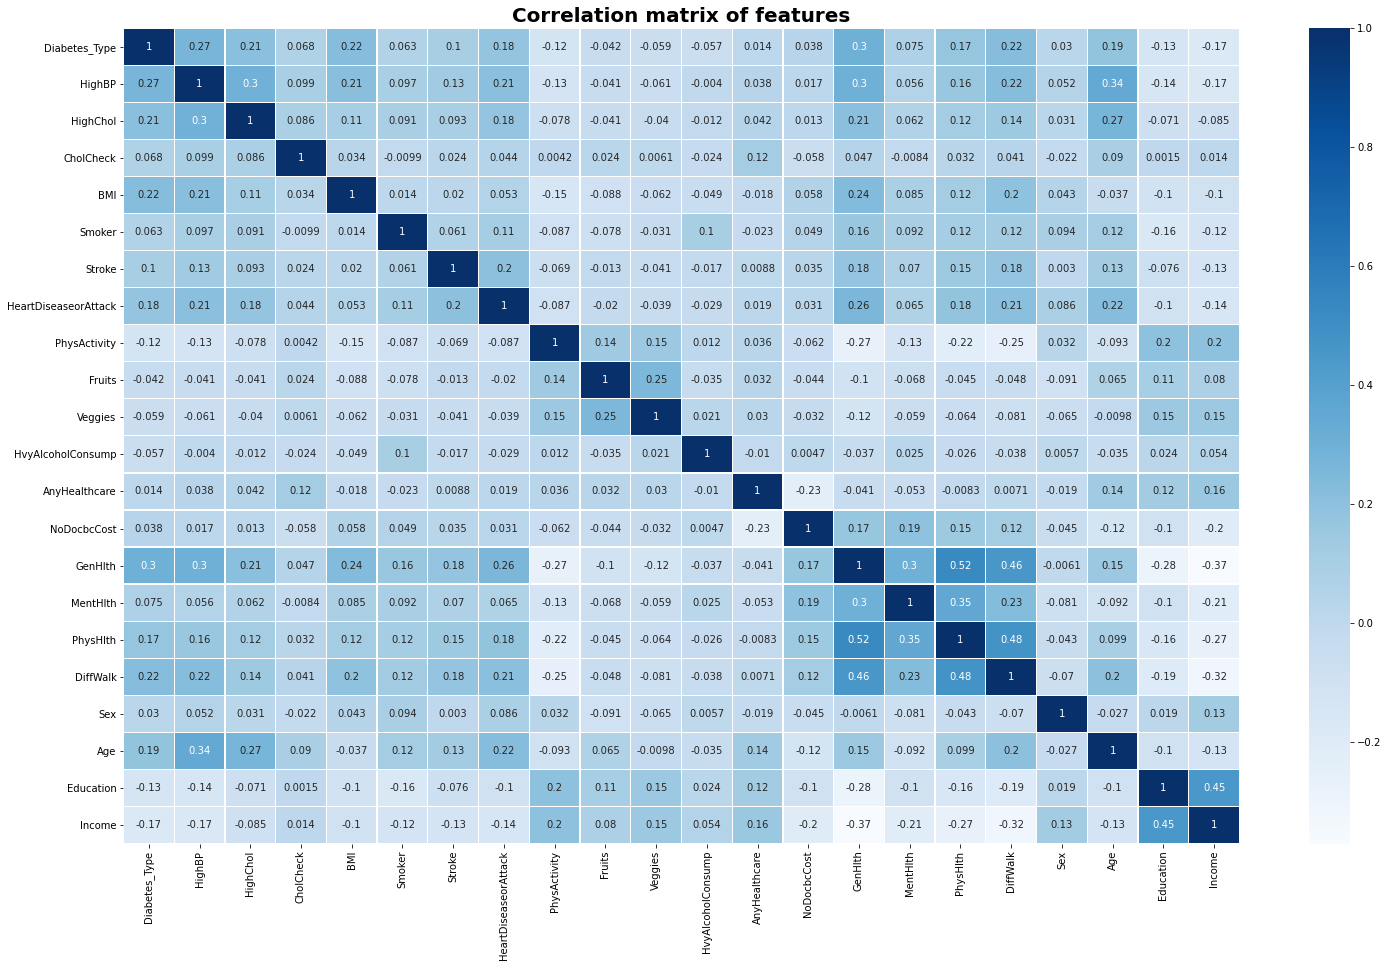

In [81]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(25,15)) 
sns.heatmap(corr,annot=True, cmap = "Blues", linewidth = 0.30)
plt.title("Correlation matrix of features",fontweight="bold",fontsize=20)
plt.show()

## Add and Transform for new Columns to Visualzation 

In [91]:
#Transform the data 
df['Diabetes_Type'] = df['Diabetes_Type'].astype('int')

In [92]:
df['Diabetes']=df['Diabetes_Type']

In [93]:
df['Diabetes'] = df['Diabetes_Type'].map({0:'No Diabetes', 1:'Diabetes'})

In [94]:
df['High_blood']=df['HighBP']
df['High_Cholesterol']=df['HighChol']
df['Heart_Attack']=df['HeartDiseaseorAttack']
df['Genral_Health']=df['GenHlth']
df['Difficulty_Walking']=df['DiffWalk']
df['Sex_Part']=df['Sex']
df['Education_level']=df['Education']
df['Income_level']=df['Income']

In [95]:
df['High_blood'] = df['HighBP'].map({0:'No High',1:'High BP'})
df['High_Cholesterol'] = df['HighChol'].map({0:'No High Cholesterol',1:'High Cholesterol'})
df['Heart_Attack'] = df['HeartDiseaseorAttack'].map({0:'No',1:'yes'})
df['Genral_Health'] = df['GenHlth'].map({1:'Excellent',2:'Very Good',3:'Good',4:'Fair',5:'Poor'})
df['Difficulty_Walking'] = df['DiffWalk'].map({0:'No',1:'yes'})
df['Sex_Part'] = df['Sex'].map({0:'Female',1:'Male'})
df['Education_level'] = df['Education'].map({1:'Never Attended School', 2:'Elementary',3:'Junior High School',4:'Senior High School',5:'Undergraduate Degree',6:'Master'})
df['Income_level'] = df['Income'].map({1:'Less Than $10,000',2:'Less Than $10,000',3:'Less Than $10,000',4:'Less Than $10,000',5:'Less Than $35,000',6:'Less Than $35,000',7:'Less Than $35,000',8:'$75,000 or More'})
df['Age_level'] = df['Age'].map({1:'18-24',2:'25-30',3:'31-35',4:'36-40',5:'41-46',6:'47-51',7:'52-56',8:'57-61',9:'62-66',10:'67-71',11:'72-76',12:'77-81',13:'Over 80'})

In [96]:
df.head()

,Diabetes_Type,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,High_blood,High_Cholesterol,Heart_Attack,Genral_Health,Difficulty_Walking,Sex_Part,Education_level,Income_level,Age_level,Diabetes
0,0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,High BP,High Cholesterol,No,Poor,yes,Female,Senior High School,"Less Than $10,000",62-66,No Diabetes
1,0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,No High,No High Cholesterol,No,Good,No,Female,Master,"Less Than $10,000",52-56,No Diabetes
2,0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,High BP,High Cholesterol,No,Poor,yes,Female,Senior High School,"$75,000 or More",62-66,No Diabetes
3,0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,High BP,No High Cholesterol,No,Very Good,No,Female,Junior High School,"Less Than $35,000",72-76,No Diabetes
4,0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,High BP,High Cholesterol,No,Very Good,No,Female,Undergraduate Degree,"Less Than $10,000",72-76,No Diabetes


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_Type         253680 non-null  int32  
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

 # Analysis and Visualization

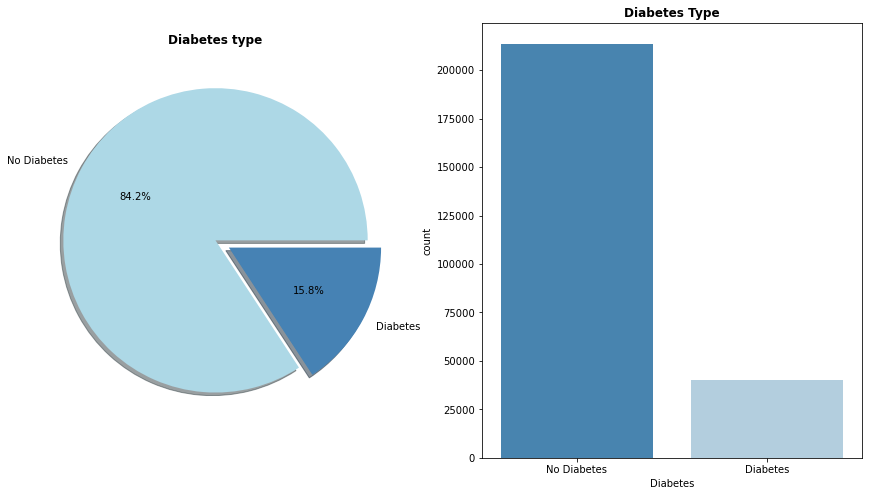

In [99]:
color=['LightBlue','SteelBlue']
f,ax=plt.subplots(1,2,figsize=(15,8))
df['Diabetes'].value_counts().plot.pie(explode=[0,0.1],colors=color,autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Diabetes type',fontweight="bold")
ax[0].set_ylabel('')
sns.countplot('Diabetes',data =df, ax=ax[1],palette='Blues_r')
ax[1].set_title('Diabetes Type',fontweight="bold")
plt.show()

In [100]:
diabetes_bp = df.groupby(['Diabetes', 'Age_level']).size().reset_index(name = 'Count')
print(diabetes_bp)

       Diabetes Age_level  Count
0      Diabetes     18-24     99
1      Diabetes     25-30    194
2      Diabetes     31-35    386
3      Diabetes     36-40    768
4      Diabetes     41-46   1214
5      Diabetes     47-51   2054
6      Diabetes     52-56   3506
7      Diabetes     57-61   4813
8      Diabetes     62-66   6435
9      Diabetes     67-71   7255
10     Diabetes     72-76   5743
11     Diabetes     77-81   3848
12     Diabetes   Over 80   3662
13  No Diabetes     18-24   5601
14  No Diabetes     25-30   7404
15  No Diabetes     31-35  10737
16  No Diabetes     36-40  13055
17  No Diabetes     41-46  14943
18  No Diabetes     47-51  17765
19  No Diabetes     52-56  22808
20  No Diabetes     57-61  26019
21  No Diabetes     62-66  26809
22  No Diabetes     67-71  24939
23  No Diabetes     72-76  17790
24  No Diabetes     77-81  12132
25  No Diabetes   Over 80  13701


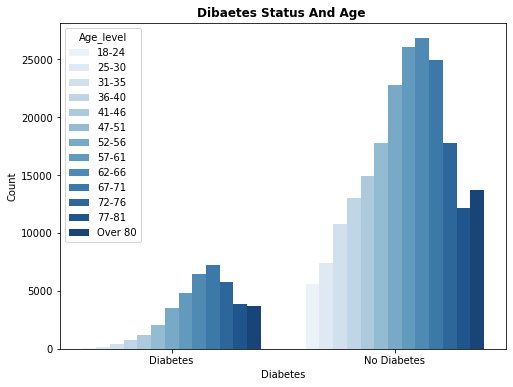

In [101]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes', y = 'Count', hue = 'Age_level', data =diabetes_bp , palette="Blues")
plt.title("Dibaetes Status And Age ",fontweight="bold")
plt.show()

In [102]:
diabetes_bp = df.groupby(['Diabetes', 'High_blood']).size().reset_index(name = 'Count')
print(diabetes_bp)

      Diabetes High_blood   Count
0     Diabetes    High BP   29517
1     Diabetes    No High   10460
2  No Diabetes    High BP   79312
3  No Diabetes    No High  134391


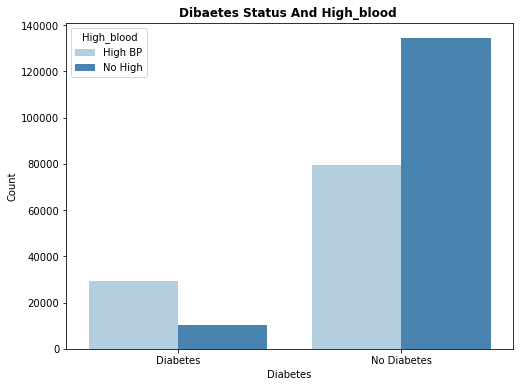

In [103]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes', y = 'Count', hue = 'High_blood', data =diabetes_bp , palette="Blues")
plt.title("Dibaetes Status And High_blood ",fontweight="bold")
plt.show()

In [104]:
diabetes_bp = df.groupby(['Diabetes', 'High_Cholesterol']).size().reset_index(name = 'Count')
print(diabetes_bp)

      Diabetes     High_Cholesterol   Count
0     Diabetes     High Cholesterol   26561
1     Diabetes  No High Cholesterol   13416
2  No Diabetes     High Cholesterol   81030
3  No Diabetes  No High Cholesterol  132673


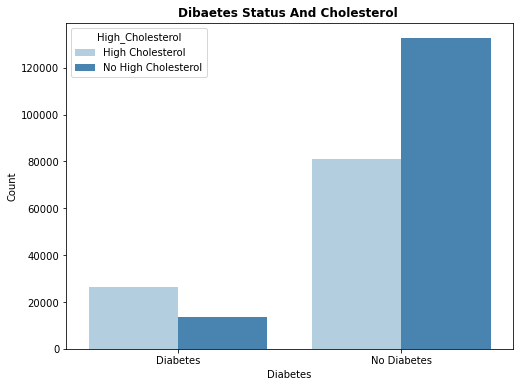

In [105]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes', y = 'Count', hue = 'High_Cholesterol', data =diabetes_bp,palette="Blues")
plt.title("Dibaetes Status And Cholesterol ",fontweight="bold")
plt.show()

In [106]:
diabetes_bp = df.groupby(['Diabetes', 'Heart_Attack']).size().reset_index(name = 'Count')
print(diabetes_bp)

      Diabetes Heart_Attack   Count
0     Diabetes           No   31435
1     Diabetes          yes    8542
2  No Diabetes           No  198352
3  No Diabetes          yes   15351


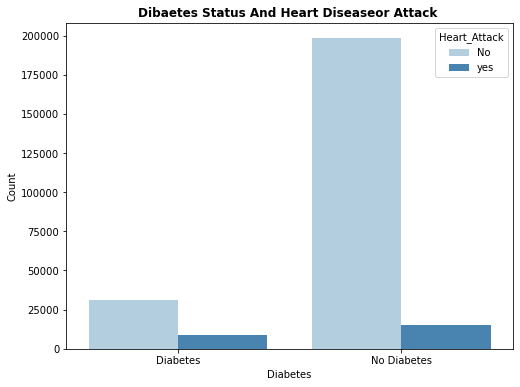

In [107]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes', y = 'Count', hue = 'Heart_Attack', data =diabetes_bp ,palette="Blues")
plt.title("Dibaetes Status And Heart Diseaseor Attack ",fontweight="bold")
plt.show()

In [108]:
diabetes_bp = df.groupby(['Diabetes', 'Genral_Health']).size().reset_index(name = 'Count')
print(diabetes_bp)

      Diabetes Genral_Health  Count
0     Diabetes     Excellent   1453
1     Diabetes          Fair  10815
2     Diabetes          Good  15185
3     Diabetes          Poor   4929
4     Diabetes     Very Good   7595
5  No Diabetes     Excellent  43846
6  No Diabetes          Fair  20755
7  No Diabetes          Good  60461
8  No Diabetes          Poor   7152
9  No Diabetes     Very Good  81489


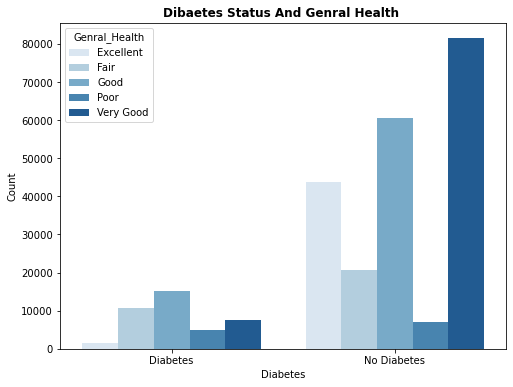

In [109]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes', y = 'Count', hue = 'Genral_Health', data =diabetes_bp, palette="Blues")
plt.title("Dibaetes Status And Genral Health ",fontweight="bold")
plt.show()

In [110]:
diabetes_bp = df.groupby(['Diabetes', 'Difficulty_Walking']).size().reset_index(name ='Count')
print(diabetes_bp)

      Diabetes Difficulty_Walking   Count
0     Diabetes                 No   25571
1     Diabetes                yes   14406
2  No Diabetes                 No  185434
3  No Diabetes                yes   28269


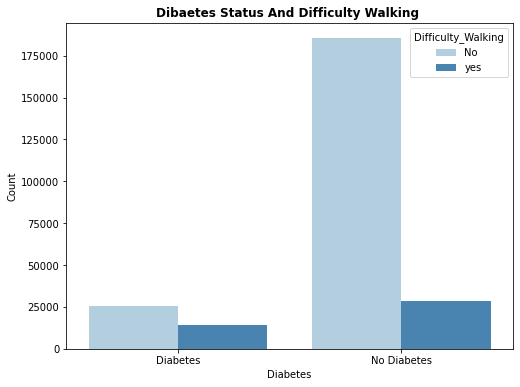

In [111]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes', y = 'Count', hue = 'Difficulty_Walking', data =diabetes_bp,palette="Blues")
plt.title("Dibaetes Status And Difficulty Walking ",fontweight="bold")
plt.show()

In [112]:
diabetes_bp = df.groupby(['Diabetes','Sex_Part']).size().reset_index(name ='Count')
print(diabetes_bp)

      Diabetes Sex_Part   Count
0     Diabetes   Female   21015
1     Diabetes     Male   18962
2  No Diabetes   Female  120959
3  No Diabetes     Male   92744


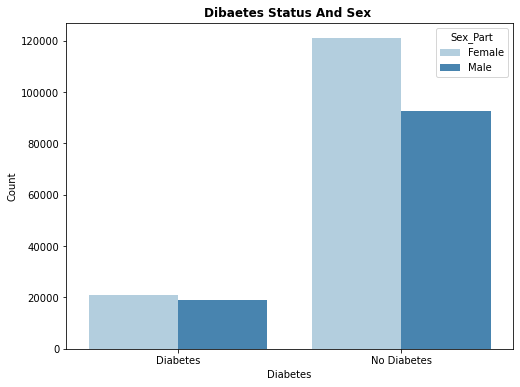

In [113]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes', y = 'Count', hue = 'Sex_Part', data =diabetes_bp , palette="Blues")
plt.title("Dibaetes Status And Sex ",fontweight="bold")
plt.show()

In [114]:
diabetes_bp = df.groupby(['Diabetes','Education_level']).size().reset_index(name ='Count')
print(diabetes_bp)


       Diabetes        Education_level  Count
0      Diabetes             Elementary   1344
1      Diabetes     Junior High School   2610
2      Diabetes                 Master  11871
3      Diabetes  Never Attended School     49
4      Diabetes     Senior High School  12416
5      Diabetes   Undergraduate Degree  11687
6   No Diabetes             Elementary   2699
7   No Diabetes     Junior High School   6868
8   No Diabetes                 Master  95454
9   No Diabetes  Never Attended School    125
10  No Diabetes     Senior High School  50334
11  No Diabetes   Undergraduate Degree  58223


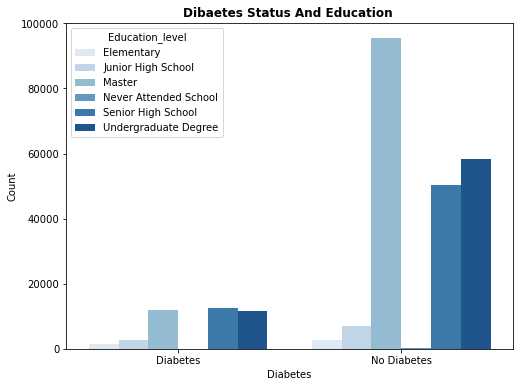

In [115]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes', y = 'Count', hue = 'Education_level', data =diabetes_bp, palette="Blues")
plt.title("Dibaetes Status And Education ",fontweight="bold")
plt.show()

In [116]:
diabetes_bp = df.groupby(['Diabetes','Income_level']).size().reset_index(name ='Count')
print(diabetes_bp)

      Diabetes       Income_level  Count
0     Diabetes    $75,000 or More   8206
1     Diabetes  Less Than $10,000  14641
2     Diabetes  Less Than $35,000  17130
3  No Diabetes    $75,000 or More  82179
4  No Diabetes  Less Than $10,000  43082
5  No Diabetes  Less Than $35,000  88442


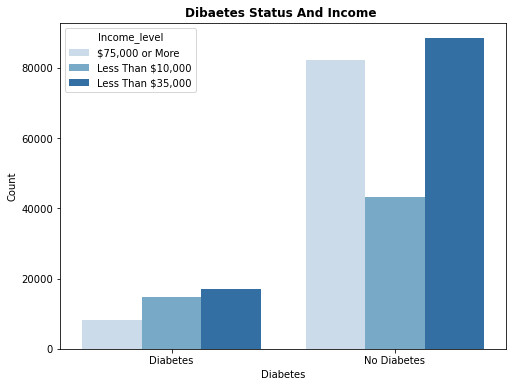

In [117]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabetes', y = 'Count', hue = 'Income_level', data =diabetes_bp,palette="Blues")
plt.title("Dibaetes Status And Income ",fontweight="bold")
plt.show()

In [118]:
diabetes_bp1= df.groupby(['Diabetes','Age']).size().reset_index(name ='Count')
print(diabetes_bp)

      Diabetes       Income_level  Count
0     Diabetes    $75,000 or More   8206
1     Diabetes  Less Than $10,000  14641
2     Diabetes  Less Than $35,000  17130
3  No Diabetes    $75,000 or More  82179
4  No Diabetes  Less Than $10,000  43082
5  No Diabetes  Less Than $35,000  88442


In [119]:
df.shape

(253680, 32)

In [120]:
diabetes_bp2 = df.groupby(['Diabetes','BMI']).size().reset_index(name ='Count')
print(diabetes_bp2)

        Diabetes   BMI  Count
0       Diabetes  13.0      3
1       Diabetes  14.0      5
2       Diabetes  15.0     12
3       Diabetes  16.0     22
4       Diabetes  17.0     57
5       Diabetes  18.0     98
6       Diabetes  19.0    173
7       Diabetes  20.0    288
8       Diabetes  21.0    554
9       Diabetes  22.0    832
10      Diabetes  23.0   1069
11      Diabetes  24.0   1701
12      Diabetes  25.0   1686
13      Diabetes  26.0   2287
14      Diabetes  27.0   3183
15      Diabetes  28.0   2543
16      Diabetes  29.0   2519
17      Diabetes  30.0   2664
18      Diabetes  31.0   2384
19      Diabetes  32.0   2397
20      Diabetes  33.0   2274
21      Diabetes  34.0   1877
22      Diabetes  35.0   1600
23      Diabetes  36.0   1397
24      Diabetes  37.0   1238
25      Diabetes  38.0   1114
26      Diabetes  39.0    968
27      Diabetes  40.0    806
28      Diabetes  41.0    571
29      Diabetes  42.0    555
30      Diabetes  43.0    551
31      Diabetes  44.0    377
32      Di

In [121]:
cat_cols = ['Diabetes', 'High_blood', 'High_Cholesterol', 'Heart_Attack', 
                    'PhysActivity', 'Genral_Health','Difficulty_Walking', 'Age']

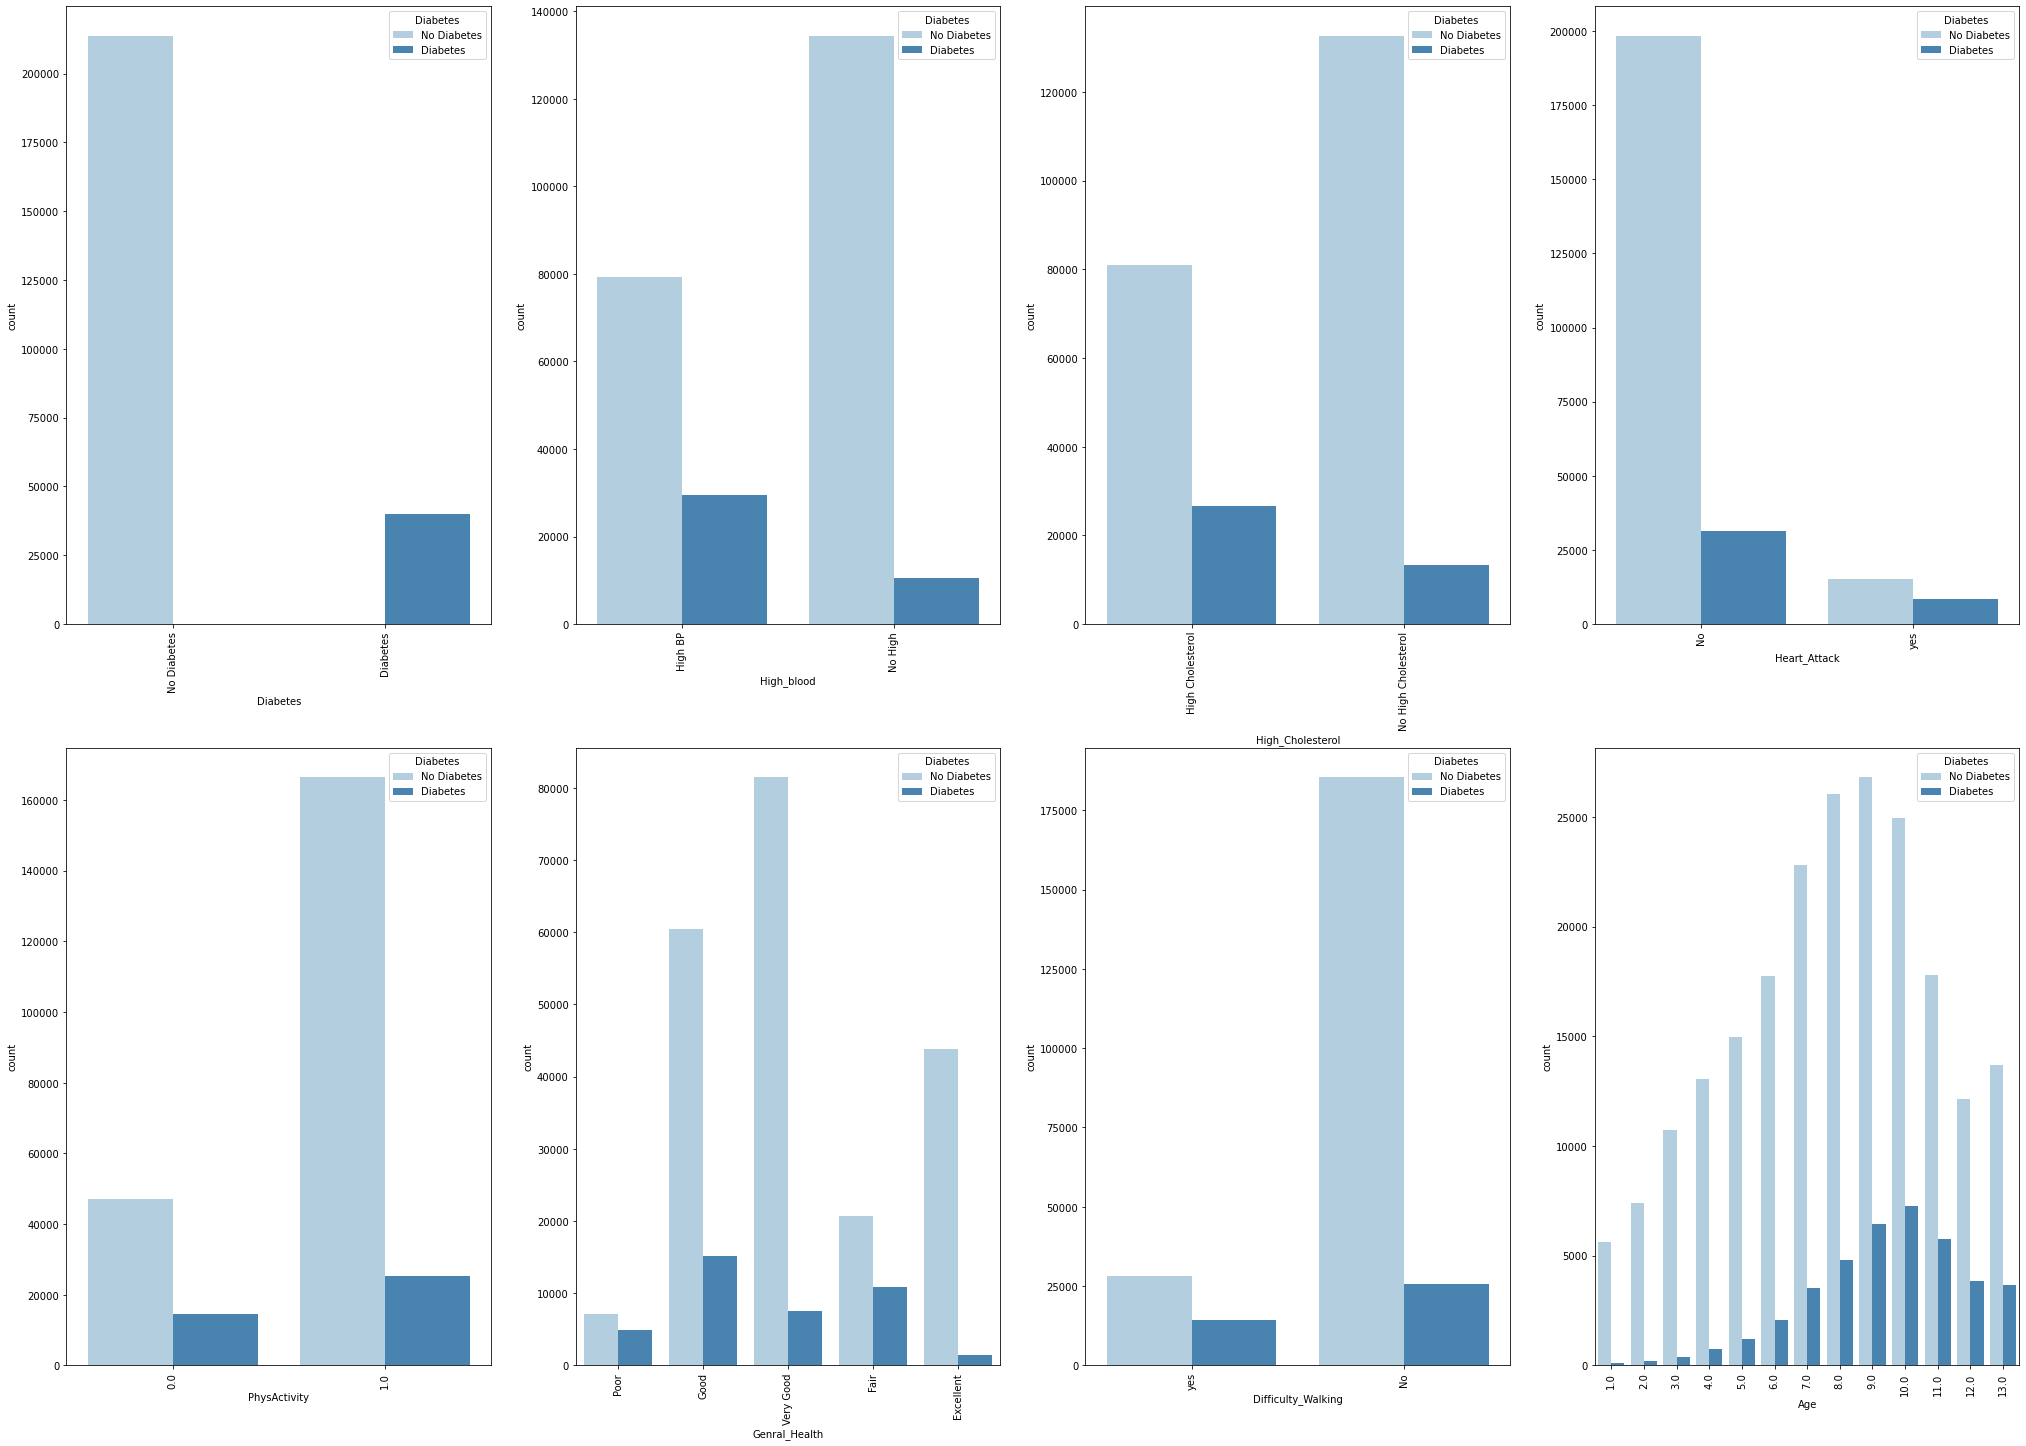

In [122]:
fig, ax = plt.subplots(2, 4, figsize=(35,25))
for variable, subplot in zip(cat_cols[:8], ax.flatten()):
    sns.countplot(df[variable],hue=df['Diabetes'], ax=subplot, palette='Blues')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [123]:
## --------------- End-------------------## 